# Hypothesis Testing

From lecture, we know that hypothesis testing is a critical tool in determing what the value of a parameter could be.

We know that the basis of our testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

The tests we have discussed in lecture are:

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

In this tutorial, I will introduce some functions that are extremely useful when calculating a t-statistic and p-value for a hypothesis test.

Let's quickly review the following ways to calculate a test statistic for the tests listed above.

The equation is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$ 

We will use the examples from our lectures and use python functions to streamline our tests.

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### One Population Proportion

#### Research Question 

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [7]:
n = 1018
pnull = 0.52
phat = 0.56
zstat, pval = sm.stats.proportions_ztest(phat * n, n, pnull, 
                           alternative='larger')
print('zstat: ', zstat)
print('pval: ', pval)

# zstat manually
zstat = (phat - pnull) / np.sqrt(pnull*(1-pnull)/n)
print(ztest)

zstat:  2.571067795759113
pval:  0.005069273865860533
2.5545334262132955


In [4]:
sm.stats.proportions_ztest?

### Difference in Population Proportions

#### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  
**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  


91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [14]:
# This example implements the analysis from the "Difference in Two Proportions" lecture videos

# sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1,2)
p2 = round(y2 / n2,2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1/n1 + 1/n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print('Test Statistic: ', round(test_stat, 2))
print('P-value: ', round(pvalue, 2))






Test Statistic:  -0.48
P-value:  0.63


In [10]:
?dist.norm.cdf

### One Population Mean

#### Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.
**Null Hypothesis:** $\mu$ = 80
**Alternative Hypthosis:** $\mu$ > 80

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

In [16]:
df = pd.read_csv('data/Cartwheeldata.csv')
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [23]:
null = 80
n = len(df)
mean = df['CWDistance'].mean()
sd = df['CWDistance'].std()
(n, mean, sd)

(25, 82.48, 15.058552387264852)

In [24]:
sm.stats.ztest(df['CWDistance'], value = 80, alternative = 'larger')

(0.8234523266982029, 0.20512540845395266)

In [25]:
?sm.stats.ztest

In [32]:
# manually
ztest = (mean - null) / (sd / np.sqrt(n))
pval = dist.norm.cdf(-np.abs(ztest))
(ztest, pval)


(0.8234523266982029, 0.20512540845395266)

### Difference in Population Means

#### Research Question 

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [33]:
da = pd.read_csv('data/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [36]:
da_females = da.loc[da['RIAGENDR'] == 2]
da_males = da.loc[da['RIAGENDR'] == 1]

n1 = len(da_females)
mu1 = da_females['BMXBMI'].mean()
sd1 = da_females['BMXBMI'].std()
print((n1, mu1, sd1))

n2 = len(da_males)
mu2 = da_males['BMXBMI'].mean()
sd2 = da_males['BMXBMI'].std()

print((n2, mu2, sd2))

(2976, 29.93994565217392, 7.753318809545674)
(2759, 28.778072111846942, 6.2525676168014614)


In [35]:
da_females.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210


In [38]:
sm.stats.ztest(da_females['BMXBMI'].dropna(), da_males['BMXBMI'].dropna())

(6.1755933531383205, 6.591544431126401e-10)

In [40]:
# Manually
ztest = ((mu1 - mu2) - 0) / np.sqrt(((n1-1)*(sd1**2) + (n2-1)*(sd2**2)) / (n1+n2-2)) * np.sqrt(1/n1 + 1/n2)
ztest

0.004342493996136651

# NHANES Hypothesis Testing Walkthrough

In this notebook we demonstrate formal hypothesis testing using the NHANES data.

It is important to note that the NHANES data are a "complex survey".  The data are not an independent and representative sample from the target population.  Proper analysis of complex survey data should make use of additional information about how the data were collected.  Since complex survey analysis is a somewhat specialized topic, we ignore this aspect of the data here, and analyze the NHANES data as if it were an independent and identically distributed sample from a population.

In [41]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg') # workaround, there may be a better way
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Below we read the data, and convert some of the integer codes to text values.

In [45]:
da = pd.read_csv('data/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [48]:
print(da['RIAGENDR'].unique())
print(da['SMQ020'].unique())
da['SMQ020x'] = da['SMQ020'].replace({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female', 7: np.nan, 9: np.nan})
da.head()


[1 2]
[1 2 7 9]


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Yes,Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Yes,Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Yes,Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No,Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,No,Female


### Hypothesis Tests for One Proportion

The most basic hypothesis test may be the one-sample test for a proportion.  This test is used if we have specified a particular value as the null value for the proportion, and we wish to assess if the data are compatible with the true parameter value being equal to this specified value.  One-sample tests are not used very often in practice, because it is not very common that we have a specific fixed value to use for comparison. For illustration, imagine that the rate of lifetime smoking in another country was known to be 40%, and we wished to assess whether the rate of lifetime smoking in the US were different from 40%.  In the following notebook cell, we carry out the (two-sided) one-sample test that the population proportion of smokers is 0.4, and obtain a p-value of 0.43.  This indicates that the NHANES data are compatible with the proportion of (ever) smokers in the US being 40%. 

In [54]:
x = da['SMQ020x'].dropna() == 'Yes'
p = x.mean()
print('p: ', p)

se = np.sqrt(0.4 * (1 - 0.4) / len(x))
print('se: ', se)

test_stat = (p - 0.4) / se
print('test_stat: ', test_stat)

pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
print('pvalue: ', pvalue)

p:  0.4050655021834061
se:  0.00647467353462031
test_stat:  0.7823563854332805
pvalue:  0.4340051581348052


In [53]:
?dist.norm.cdf

The following cell carries out the same test as performed above using the Statsmodels library. The results in the first (default) case below are slightly different from the results obtained above because Statsmodels by default uses the sample proportion instead of the null proportion when computing the standard error. This distinction is rarely consequential, but we can specify that the null proportion should be used to calculate the standard error, and the results agree exactly with what we calculated above. The first two lines below carry out tests using the normal approximation to the sampling distribution of the test statistic, and the third line below carries uses the exact binomial sampling distribution. We can see here that the p-values are nearly identical in all three cases. This is expected when the sample size is large, and the proportion is not close to either 0 or 1.

In [55]:
sm.stats.proportions_ztest(x.sum(), len(x), 0.4)

(0.7807518954896244, 0.43494843171868214)

In [56]:
?sm.stats.proportions_ztest

In [ ]:
sm.stats.binom_test(x.sum(), len(x), 0.4)

### Hypothesis Tests for Two Proportions

Comparative tests tend to be used much more frequently than tests comparing one population to a fixed value.  A two-sample test of proportions is used to assess whether the proportion of individuals with some trait differs between two sub-populations.  For example, we can compare the smoking rates between females and males. Since smoking rates vary strongly with age, we do this in the subpopulation of people between 20 and 25 years of age.  In the cell below, we carry out this test without using any libraries, implementing all the test procedures covered elsewhere in the course using Python code.  We find that the smoking rate for men is around 10 percentage points greater than the smoking rate for females, and this difference is statistically significant (the p-value is around 0.01).

In [61]:
dx = da[['SMQ020x', 'RIDAGEYR', 'RIAGENDRx']].dropna()
dx.head()


,SMQ020x,RIDAGEYR,RIAGENDRx
0,Yes,62,Male
1,Yes,53,Male
2,Yes,78,Male
3,No,56,Female
4,No,42,Female


In [70]:
p = dx.groupby('RIAGENDRx')['SMQ020x'].agg([lambda z: np.mean(z == 'Yes'), 'size'])
p.columns = ['Smoke', 'N']
p

,Smoke,N
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [69]:
dx.groupby('RIAGENDRx')['SMQ020x'].value_counts().unstack()

SMQ020x,No,Yes
RIAGENDRx,,
Female,2066,906
Male,1340,1413


Essentially the same test as above can be conducted by converting the "Yes"/"No" responses to numbers (Yes=1, No=0) and conducting a two-sample t-test, as below:

In [88]:
p_comb = (dx['SMQ020x'] == 'Yes').mean()
print('p_comb: ', p_comb)
va_comb = p_comb * (1 - p_comb)
print('va_comb: ', va_comb)
se = np.sqrt(va * (1/p.N.Female + 1/p.N.Male))
print('se: ', se)
test_stat = (p.Smoke.Female - p.Smoke.Male) / se
print('test_stat: ', test_stat)
p_value = 2 * dist.norm.cdf(-np.abs(test_stat))
print('p_value: ', p_value)

p_comb:  0.4050655021834061
va_comb:  0.2409874411243111
se:  0.01298546309757376
test_stat:  -16.049719603652488
p_value:  5.742288777302776e-58


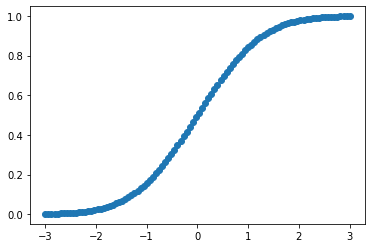

In [87]:
x = np.linspace(-3,3,100)
y = dist.norm.cdf(x)
y
plt.scatter(x = x, y = y)
#?np.linspace

In [93]:
dx_females = dx.loc[dx.RIAGENDRx == 'Female', 'SMQ020x'].replace({'Yes': 1, 'No': 0})
dx_females.head()

3     0
4     0
5     0
7     0
12    1
Name: SMQ020x, dtype: int64

In [94]:
dx_males = dx.loc[dx.RIAGENDRx == 'Male', 'SMQ020x'].replace({'Yes': 1, 'No': 0})
dx_males.head()

0    1
1    1
2    1
6    1
8    0
Name: SMQ020x, dtype: int64

In [95]:
sm.stats.ttest_ind(dx_females, dx_males)

(-16.42058555898443, 3.032088786691117e-59, 5723.0)

In [98]:
?sm.stats.ttest_ind

### Hypothesis Tests Comparing Means

Tests of means are similar in many ways to tests of proportions.  Just as with proportions, for comparing means there are one and two-sample tests, z-tests and t-tests, and one-sided and two-sided tests.  As with tests of proportions, one-sample tests of means are not very common, but we illustrate a one sample test in the cell below.  We compare systolic blood pressure to the fixed value 120 (which is the lower threshold for "pre-hypertension"), and find that the mean is significantly different from 120 (the point estimate of the mean is 126).

In [99]:
dx = da[["BPXSY1", "RIDAGEYR", "RIAGENDRx"]].dropna()
dx.head()

,BPXSY1,RIDAGEYR,RIAGENDRx
0,128.0,62,Male
1,146.0,53,Male
2,138.0,78,Male
3,132.0,56,Female
4,100.0,42,Female


In [102]:
dx = dx.loc[(dx.RIDAGEYR >= 40) & (dx.RIDAGEYR <= 50) & (dx.RIAGENDRx == 'Male'), :]
dx.head()

,BPXSY1,RIDAGEYR,RIAGENDRx
10,144.0,46,Male
11,116.0,45,Male
20,110.0,49,Male
42,128.0,42,Male
51,118.0,50,Male


In [104]:
print(dx.BPXSY1.mean())
sm.stats.ztest(dx.BPXSY1, value = 120)

125.86698337292161


(7.469764137102597, 8.033869113167905e-14)

In the cell below, we carry out a formal test of the null hypothesis that the mean blood pressure for women between the ages of 50 and 60 is equal to the mean blood pressure of men between the ages of 50 and 60.  The results indicate that while the mean systolic blood pressure for men is slightly greater than that for women (129 mm/Hg versus 128 mm/Hg), this difference is not statistically significant. 

There are a number of different variants on the two-sample t-test. Two often-encountered variants are the t-test carried out using the t-distribution, and the t-test carried out using the normal approximation to the reference distribution of the test statistic, often called a z-test.  Below we display results from both these testing approaches.  When the sample size is large, the difference between the t-test and z-test is very small. 

In [105]:
dx = da[["BPXSY1", "RIDAGEYR", "RIAGENDRx"]].dropna()
dx = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), :]
dx.head()

,BPXSY1,RIDAGEYR,RIAGENDRx
1,146.0,53,Male
3,132.0,56,Female
9,178.0,56,Male
15,134.0,57,Female
19,136.0,54,Female


In [106]:
bpx_female = dx.loc[dx['RIAGENDRx'] == 'Female', 'BPXSY1']
bpx_male = dx.loc[dx['RIAGENDRx'] == 'Male', 'BPXSY1']
print(bpx_female.mean(), bpx_male.mean())

127.92561983471074 129.23829787234044


In [108]:
sm.stats.ztest(bpx_female, bpx_male)

(-1.105435895556249, 0.2689707570859362)

In [110]:
sm.stats.ttest_ind(bpx_female, bpx_male)

(-1.105435895556249, 0.26925004137768577, 952.0)

Another important aspect of two-sample mean testing is "heteroscedasticity", meaning that the variances within the two groups being compared may be different. While the goal of the test is to compare the means, the variances play an important role in calibrating the statistics (deciding how big the mean difference needs to be to be declared statisitically significant). In the NHANES data, we see that there are moderate differences between the amount of variation in BMI for females and for males, looking within 10-year age bands. In every age band, females having greater variation than males.

In [113]:
dx = da[["BMXBMI", "RIDAGEYR", "RIAGENDRx"]].dropna()
dx['agegrp'] = pd.cut(da['RIDAGEYR'], [18,30,40,50,60,70,80])
dx.groupby(['agegrp', 'RIAGENDRx'])['BMXBMI'].agg(np.std).unstack()


RIAGENDRx,Female,Male
agegrp,,
"(18, 30]",7.745893,6.649440
"(30, 40]",8.315608,6.622412
"(40, 50]",8.076195,6.407076
"(50, 60]",7.575848,5.914373
"(60, 70]",7.604514,5.933307
"(70, 80]",6.284968,4.974855


The standard error of the mean difference (e.g. mean female blood pressure minus mean mal blood pressure) can be estimated in at least two different ways. In the statsmodels library, these approaches are referred to as the "pooled" and the "unequal" approach to estimating the variance. If the variances are equal (i.e. there is no heteroscedasticity), then there should be little difference between the two approaches. Even in the presence of moderate heteroscedasticity, as we have here, we can see that the results for the two differences are quite similar. Below we have a loop that considers each 10-year age band and assesses the evidence for a difference in mean BMI for women and for men. The results printed in each row of output are the test-statistic and p-value.

In [116]:
for k, v in dx.groupby('agegrp'):
    bmi_female = v.loc[v.RIAGENDRx == 'Female', 'BMXBMI'].dropna()
    bmi_female = sm.stats.DescrStatsW(bmi_female)
    bmi_male = v.loc[v.RIAGENDRx == 'Male', 'BMXBMI'].dropna()
    bmi_male = sm.stats.DescrStatsW(bmi_male)
    print(k)
    print('pooled: ', sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar = 'pooled'))
    print('unequal: ', sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar = 'unequal'))
    print()
    

(18, 30]
pooled:  (1.7026932933643388, 0.08862548061449649)
unequal:  (1.7174610823927268, 0.08589495934713022)

(30, 40]
pooled:  (1.4378280405644916, 0.1504828511464818)
unequal:  (1.4437869620833494, 0.14879891057892475)

(40, 50]
pooled:  (2.8933761158070186, 0.003811246059501354)
unequal:  (2.9678691663536725, 0.0029987194174035366)

(50, 60]
pooled:  (3.362108779981367, 0.0007734964571391746)
unequal:  (3.375494390173923, 0.0007368319423226574)

(60, 70]
pooled:  (3.6172401442432753, 0.000297761021031936)
unequal:  (3.62848309454456, 0.0002850914147149227)

(70, 80]
pooled:  (2.926729252512258, 0.0034254694144858636)
unequal:  (2.937779886769224, 0.003305716331519299)

